<a href="https://colab.research.google.com/github/AmruthaReddy1397/Detection_of_malaria/blob/main/Malaria_Detection_using_Mobilenet_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the kaggle package into colab
! pip install -q kaggle

In [ ]:
#Loading the generated API token which creates a username and key
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amruthareddy123","key":"e21880c19a86acdad1ec9d6369d03564"}'}

In [ ]:
#creating a directory
! mkdir ~/.kaggle

In [ ]:
#copying the json file to the directory
!cp kaggle.json ~/.kaggle/

In [ ]:
#Changing the permission to read and write mode
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 662M/675M [00:05<00:00, 135MB/s]
100% 675M/675M [00:06<00:00, 117MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
#Thumbs.db is a database file automatically generated which displays thumbnails.
#removing the thumbs.db file of parasitized folder
!rm /content/cell_images/Parasitized/Thumbs.db

In [ ]:
#removing the thumbs.db file of the Uninfected folder
!rm /content/cell_images/Uninfected/Thumbs.db

In [ ]:
import os 
import cv2 #Python bindings for computer vision
import matplotlib.pyplot as plt #For Data Visualization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #For Data Augumentation
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
#os.listdir() lists the files and sub-directories in specified directory
#os.path.join() is used to concatenate paths.
base_path = '/content/cell_images'
print(os.listdir(base_path)) #listing the folders in content/cell_images
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Uninfected', 'Parasitized', 'cell_images']
Total Parasitized images 13779
Total Uninfected images 13779


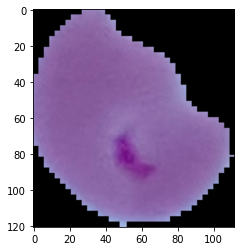

In [ ]:
DATADIR = "/content/cell_images"

CATEGORIES = ["Parasitized", "Uninfected"]

for category in CATEGORIES:  # do Parasitized and Uninfected
    path = os.path.join(DATADIR,category)  # create path to Parasitized and Uninfected
    for img in os.listdir(path):  # iterate over each image per Parasitized and Uninfected
        img_data = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_data, cmap='gray')  # graph it
        plt.show()  # display
        break
    break

In [ ]:
#Installing split-folders which is used to split a folder to train, validation and test data folders
!pip install split-folders

In [ ]:
# splitting the data into train, validation and test set
import splitfolders
os.mkdir('images')  # directory to store the Training, Validation and Testing datasets
input_folder = os.path.join(base_path, 'cell_images')
output_folder = 'images'
splitfolders.ratio(input_folder, output=output_folder, seed=10, ratio=(.70, .15, .15), group_prefix=None) # default values

Copying files: 27560 files [00:04, 5607.03 files/s]


In [ ]:
# checking the newly created directory structure
input_path = 'images'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

test
['Uninfected', 'Parasitized']
val
['Uninfected', 'Parasitized']
train
['Uninfected', 'Parasitized']


In [ ]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')

In [ ]:
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 9646
total training Uninfected images : 9646
total validation Parasitized images : 2067
total validation Uninfected images : 2067
total test Parasitized images : 2067
total test Uninfected images : 2067


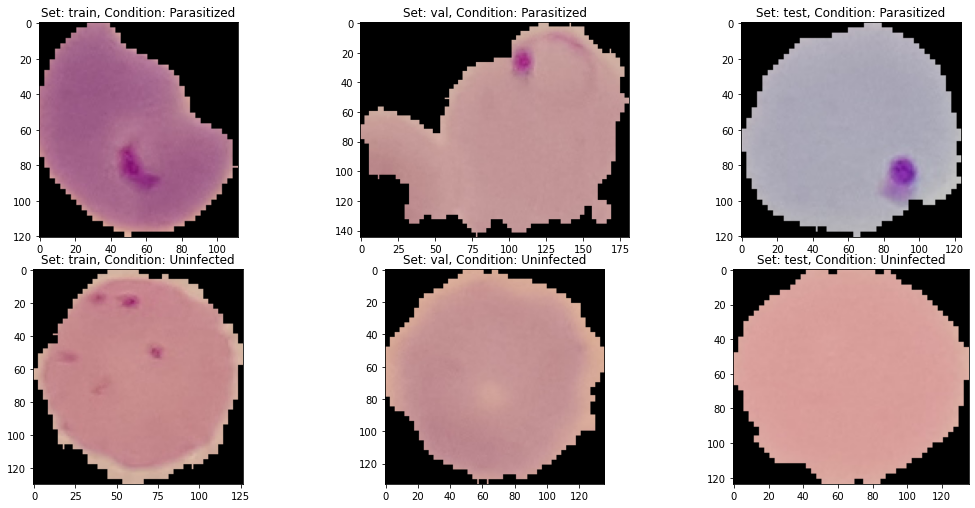

In [ ]:
input_path = 'images/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Parasitized/'+os.listdir(set_path+'/Parasitized')[0]))
    ax[i].set_title('Set: {}, Condition: Parasitized'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Uninfected/'+os.listdir(set_path+'/Uninfected')[0]))
    ax[i+3].set_title('Set: {}, Condition: Uninfected'.format(_set))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
IMG_SHAPE=(224, 224, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dense(20, activation = "relu"),
                                 tf.keras.layers.Dropout(0.4),
                                 tf.keras.layers.Dense(10, activation = "relu"),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, kernel_regularizer = l2(0.001), activation = "linear")                                     
                                ])

In [ ]:
model.compile(loss='hinge',
              optimizer= 'adam',
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1280)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                25620     
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('images/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 19290 images belonging to 2 classes.


In [ ]:
validation_set = val_datagen.flow_from_directory('images/val',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('images/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4134 images belonging to 2 classes.


In [ ]:
import math
tma = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=5,
  steps_per_epoch=math.ceil(len(training_set)/32),
  validation_steps=len(validation_set))

Epoch 1/5
19/19 [==============================] - 62s 3s/step - loss: 0.8492 - acc: 0.6130 - val_loss: 0.3043 - val_acc: 0.8609
Epoch 2/5
19/19 [==============================] - 60s 3s/step - loss: 0.6236 - acc: 0.7072 - val_loss: 0.2790 - val_acc: 0.8761
Epoch 3/5
19/19 [==============================] - 60s 3s/step - loss: 0.5832 - acc: 0.7220 - val_loss: 0.3002 - val_acc: 0.8822
Epoch 4/5
19/19 [==============================] - 61s 3s/step - loss: 0.5044 - acc: 0.7582 - val_loss: 0.2563 - val_acc: 0.9054
Epoch 5/5
19/19 [==============================] - 57s 3s/step - loss: 0.4662 - acc: 0.7714 - val_loss: 0.2314 - val_acc: 0.9020


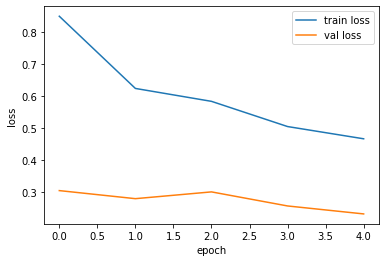

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(tma.history['loss'], label='train loss')
plt.plot(tma.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')

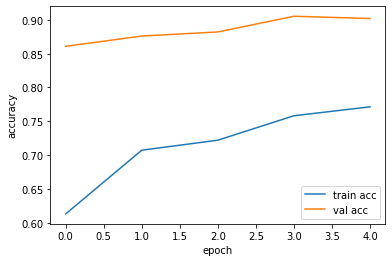

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(tma.history['acc'], label='train acc')
plt.plot(tma.history['val_acc'], label='val acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
val = model.evaluate(test_set)

130/130 [==============================] - 49s 376ms/step - loss: 0.2341 - acc: 0.8982


In [ ]:
print("test loss: ",val[0])
print("test accuracy: ",val[1])

test loss:  0.23410572111606598
test accuracy:  0.8981615900993347
